<a href="https://colab.research.google.com/github/Seongjin1225/BigData/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EA%B5%AC%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 구별 응급실 이용 현황
# 가설 -> 주거지역이 응급실 이용 현황이 많을 것
- 강서구
양천구
구로구
영등포구
관악구
동작구
금천구
강남구
송파구
강동구
- 뤼튼 기준 서울 주거지역 구
- 강북구
도봉구
노원구
은평구
강서구
양천구
구로구
금천구
동작구
관악구
서초구 (특히 외곽 지역인 우면동, 내곡동 등)
강남구 (특히 외곽 지역인 세곡동, 자곡동 등)
송파구 (외곽 지역인 위례신도시 포함)
- gpt 기준


In [ ]:
# 한글폰트깨짐 방지(실행 후 런타임 다시 시작 필요!)
# plt.rcParams['font.family'] = 'NanumGothic'
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (20.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and direc

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import folium

In [ ]:
# Raw data loading
# 주의!!! -> 컬럼의 2014.1,2 등의 숫자는 월을 의미 하는게 아님
df_gu = pd.read_csv('/content/drive/MyDrive/BigData/응급실+이용자+현황(구별)_20241106195024.csv')
df_gu

,구별(1),구별(2),2014,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,...,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
0,구별(1),구별(2),계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,구별(1),구별(2),소계,소계,소계,1세미만,1세미만,1세미만,1~9세,1~9세,...,1세미만,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세이상
2,구별(1),구별(2),계,남자,여자,계,남자,여자,계,남자,...,계,계,계,계,계,계,계,계,계,계
3,합계,소계,1408776,714946,693830,47576,26507,21069,258701,148075,...,10965,68996,48183,129805,114023,101386,117904,126520,106139,82970
4,합계,종로구,17495,8933,8562,390,232,158,2520,1469,...,137,905,671,2141,1677,1409,1767,1873,1795,1559
5,합계,중구,14332,7131,7201,316,149,167,1986,1098,...,157,897,576,2119,2068,1449,1808,1825,1524,1375
6,합계,용산구,29991,14490,15501,686,370,316,4654,2643,...,293,1718,1142,3315,3415,2677,2941,2942,2273,2338
7,합계,성동구,36436,18132,18304,1174,666,508,6082,3465,...,388,2261,1243,4125,3815,2949,3453,3547,3023,2452
8,합계,광진구,40785,19924,20861,1269,701,568,6960,3989,...,350,2088,1475,5086,3621,2905,3604,3823,3237,2502
9,합계,동대문구,40910,20715,20195,1201,662,539,6411,3591,...,327,2058,1502,4949,3579,3243,3876,4343,4204,3362


In [ ]:
# 1세 미만, 1~9세, 10~19, 20~29, 30~39, 40~49, 50~59,
# 60~69, 70 ~ 79, 80세 이상,
df_2014 = df_gu.filter(regex=r'^2014')
df_2014['구'] = df_gu['구별(2)']
df_2014 = df_2014[[df_2014.columns[-1]] + list(df_2014.columns[:-1])]

df_2015 = df_gu.filter(regex=r'^2015')
df_2015['구'] = df_gu['구별(2)']
df_2015 = df_2015[[df_2015.columns[-1]] + list(df_2015.columns[:-1])]

df_2016 = df_gu.filter(regex=r'^2016')
df_2016['구'] = df_gu['구별(2)']
df_2016 = df_2016[[df_2016.columns[-1]] + list(df_2016.columns[:-1])]

df_2017 = df_gu.filter(regex=r'^2017')
df_2017['구'] = df_gu['구별(2)']
df_2017 = df_2017[[df_2017.columns[-1]] + list(df_2017.columns[:-1])]

df_2018 = df_gu.filter(regex=r'^2018')
df_2018['구'] = df_gu['구별(2)']
df_2018 = df_2018[[df_2018.columns[-1]] + list(df_2018.columns[:-1])]

df_2019 = df_gu.filter(regex=r'^2019')
df_2019['구'] = df_gu['구별(2)']
df_2019 = df_2019[[df_2019.columns[-1]] + list(df_2019.columns[:-1])]

df_2020 = df_gu.filter(regex=r'^2020')
df_2020['구'] = df_gu['구별(2)']
df_2020 = df_2020[[df_2020.columns[-1]] + list(df_2020.columns[:-1])]

df_2021 = df_gu.filter(regex=r'^2021')
df_2021['구'] = df_gu['구별(2)']
df_2021 = df_2021[[df_2021.columns[-1]] + list(df_2021.columns[:-1])]

<ipython-input-3-d1480bc81c25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['구'] = df_gu['구별(2)']
<ipython-input-3-d1480bc81c25>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['구'] = df_gu['구별(2)']
<ipython-input-3-d1480bc81c25>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-4-cfd3808c363e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop([0,1,2,3],inplace=True)


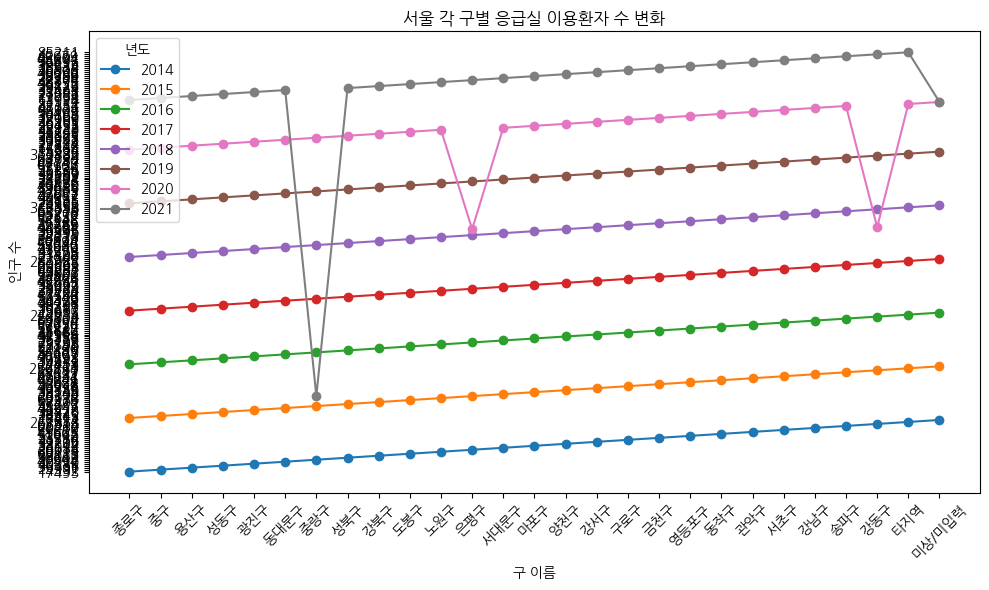

In [ ]:
df_new = df_gu[['구별(2)', '2014','2015','2016','2017','2018','2019','2020','2021']]
df_new.drop([0,1,2,3],inplace=True)
df_new

x = df_new['구별(2)']

# 그래프 설정
plt.figure(figsize=(10, 6))

# 각 년도별 데이터 그리기
for year in df_new.columns[1:]:  # '구별(2)'을 제외하고 각 년도만 순회
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.plot(x, df_new[year], marker='o', label=year)

# 그래프 제목과 라벨
plt.rcParams['font.family'] = 'NanumGothic'
plt.title('서울 각 구별 응급실 이용환자 수 변화')
plt.xlabel('구 이름')
plt.ylabel('인구 수')
plt.legend(title='년도')
plt.xticks(rotation=45)  # x축 구 이름 회전

# 그래프 표시
plt.tight_layout()
plt.show()


# 2014 ~ 2021년 구별 응급실 이용자 총합 시각화

In [ ]:
df = df_gu[['구별(2)', '2014','2015','2016','2017','2018','2019','2020','2021']].copy()
df.rename(columns = {'구별(2)' : '구별'}, inplace = True)

# 불필요 row 제거
df.drop([0,1,2,3,29,30],inplace=True)

# dtype object -> int로 변경
for col in df.columns[1:]:  # '구별' 열 제외
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

# 구별 총 합계 저장
df['합계'] = df.loc[:, '2014':].sum(axis=1)
df

# 상위 3개 지역 확인
top3 = df.nlargest(3, '합계')[['구별', '합계']]
top3

,구별,합계
14,노원구,530363
26,강남구,489402
24,관악구,479807


In [ ]:
import json
from folium import Map, Choropleth, Marker
from folium.features import DivIcon

info = df[['구별','합계']]

# # 지도 생성
map = folium.Map(location=[37.56, 126.97], zoom_start=12)

locs = {"강동구":(37.55591, 127.1354),
        "송파구":(37.51102, 127.1016),
        "강남구":(37.49829, 127.0394),
        "서초구":(37.48855, 126.9878),
        "동작구":(37.50472, 126.9420),
        "관악구":(37.47081, 126.9270),
        "금천구":(37.45604, 126.8963),
        "영등포구":(37.52560, 126.9041),
        "용산구":(37.53801, 126.9709),
        "구로구":(37.49910, 126.8334),
        "양천구":(37.52323, 126.8405),
        "강서구":(37.56192, 126.8082),
        "마포구":(37.56212, 126.8876),
        "서대문구":(37.57946, 126.9206),
        "은평구":(37.61690, 126.9134),
        "중구":(37.56211, 126.9815),
        "종로구":(37.58347, 126.9726),
        "광진구":(37.54771, 127.0695),
        "성동구":(37.55151, 127.0311),
        "동대문구":(37.58462, 127.0380),
        "성북구":(37.60572, 127.0084),
        "중랑구":(37.60120, 127.0799),
        "노원구":(37.64055, 127.0651),
        "강북구":(37.63934, 126.9999),
        "도봉구":(37.67042, 127.0195)}

# 서울시 구별 경계 데이터
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# Choropleth를 사용하여 지도에 시각화합니다
folium.Choropleth(
    geo_data=state_geo,
    data=info,
    columns=['구별', '합계'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',  # Blues
    fill_opacity=0.7,
    line_opacity=0.3,
    color='black',
    legend_name='구별 응급실 이용자 총합(2014 ~ 2021)'
).add_to(map)

# 지도 위 텍스트 표시
for key, value in locs.items():
    Marker(
        [value[0], value[1]],
        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 1.5rem; color: black; background-color:rgba(255, 255, 255, 0.2); width:85px; '\
            f'text-align:center; margin:0px;"><b>{key}</b></div>'
        )
    ).add_to(map)

map

# Prophet을 이용한 향후 이용량 예측